 # Decay of Muons and Pions

###### Chelsey McMichael and Jelena Colon

# Abstract

The purpose of this experiment is to determine the masses of a pion and a muon based on photographs of the bubble chamber in which they decayed. The photographs are visual records of a pion being accelerated in an electric field and decaying into a muon. The muon then travels for a short distance and decays into a positron. By measuring the radius of the path of the position and the length of the path of the muon, we determined their masses to be 146.63 MeV/c^2 and 109.97 MeV/c^2, respectively. Compared to the theoretical value, our error in measurement for the mass of the muon was calculated to be 0.02548% and for the mass of the muon it was calculated to be 6.024%.

# Introduction

The photographs used in this experiment are visual records of the trail of ionization left by a charged particle in a bubble chamber. This allows us to examine the trajectory of the particle which would change when it decays into a new particle. In the photographs we examined, a pion was accelerated through the bubble chamber and followed a curved path due to the electric field. Once decayed into a muon there is an abrupt change in trajectory due to the muon traveling for a short distance making it appear as a straight line until it decays into a positron. The decay into a positron again marks an abrupt change in trajectory and it starts to move in a curved path. By measuring the radius of the path of the position and the length of the path of the muon, we are able to determine their approximate masses.

# Data

# Calculations 

In [2]:
from astropy.io import ascii
data=ascii.read("data.csv")
avg = sum(data['radius']) / len(data['radius'])
print('The average radius is', data['radius'].mean())

avg1 = sum(data['length']) / len(data['length'])
print('The average length is', data['length'].mean())

The average radius is 10.9
The average length is 1.01923863636


In [4]:
l_avg =1.01923863636  #cm
r_avg = 10.9  #cm

#c = (3 * 10) ** 10 #cm/s
c = 1
r_per = (r_avg) / (0.785) #cm
rho = .07 #gm/cm^3

l_per = l_avg / .785 #cm

m_muon = 3* (2.64 * r_per) /c #MeV/c^2

T = (2.1*((m_muon)* c **2) * rho * l_per)**.5

p_muon = ((T**2) + (2*T*(m_muon)* (c**2)))**.5

m_pion = ((((p_muon * c)**2+ (m_muon * c ** 2) ** 2) **.5) + (p_muon * c ))/ (c **2) #MeV/c^2


print('The mass of the muon is',m_muon, 'MeV/c^2')

print('The mass of the pion is', m_pion, 'MeV/c^2')

The mass of the muon is 109.971974522293 MeV/c^2
The mass of the pion is 146.6260201304343 MeV/c^2


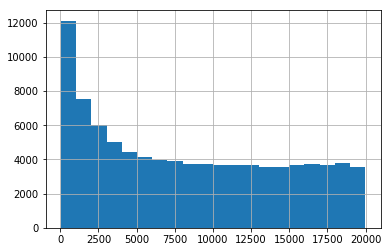

In [5]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

data=ascii.read("exp_data.csv")
time_change = data['delta_t']
plt.hist(time_change,bins =20)
plt.grid(True)
plt.show()
#this should be nongaussian


SyntaxError: invalid syntax (<ipython-input-6-33d5036dff70>, line 1)

# Conclusion